# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [12]:
def weather_plot(plot_name, axis_x, axis_y, title, labelx, labely):
    fig, plot_name = plt.subplots(figsize=(8,5))
    fig.suptitle(title, fontsize='14')
    
    axis_xs = axis_x
    axis_xs_mean = axis_xs.mean()
    axis_ys = axis_y

    plot_name.scatter(axis_xs, axis_ys, color='steelblue', marker='o', edgecolors='black')
    plot_name.grid()
    plot_name.set_xlabel(labelx)
    plot_name.set_ylabel(labely)
    #plot_name.set_xlim([60,105])
    plot_name.legend(loc='best')
    
    plt.savefig('figures/' + str(title.replace(' ','_')) + '.png')
    return plt.show()

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
_api_city = []
_api_cloudiness = []
_api_country = []
_api_date = []
_api_humidity = []
_api_lat = []
_api_lng = []
_api_max_temp = []
_api_wind_speed = []
_api_cities_dict = {}

_open_weather_url = 'https://api.openweathermap.org/data/2.5/weather?'
print('Beginning Data Retrieval\n-----------------------------')
for i in cities:
    _query_url = _open_weather_url + 'q='+i+'&appid='+api_key
    _api_data = requests.get(_query_url).json()
    if(_api_data['cod'] == 200):
        print("Retrieving data from " + str(i))
        _api_city.append(i)
        _api_cloudiness.append(_api_data['clouds']['all'])
        _api_country.append(_api_data['sys']['country'])
        _api_date.append(_api_data['dt'])
        _api_humidity.append(_api_data['main']['humidity'])
        _api_lat.append(_api_data['coord']['lat'])
        _api_lng.append(_api_data['coord']['lon'])
        _api_max_temp.append(_api_data['main']['temp_max'])
        _api_wind_speed.append(_api_data['wind']['speed'])
    else:
        print(str(i) + ' not found. Skipping...' )


Beginning Data Retrieval
-----------------------------
Retrieving data from rikitea
suao not found. Skipping...
Retrieving data from lagoa
Retrieving data from hermanus
Retrieving data from suntar
Retrieving data from chuy
Retrieving data from shelburne
Retrieving data from port blair
Retrieving data from torbay
Retrieving data from klaksvik
Retrieving data from wagar
Retrieving data from ushuaia
Retrieving data from new norfolk
Retrieving data from marystown
el balyana not found. Skipping...
Retrieving data from busselton
Retrieving data from punta arenas
illoqqortoormiut not found. Skipping...
Retrieving data from moura
Retrieving data from presidencia roque saenz pena
Retrieving data from ribeira grande
Retrieving data from port alfred
Retrieving data from mar del plata
Retrieving data from umm lajj
Retrieving data from kitsuki
Retrieving data from rio gallegos
Retrieving data from mataura
Retrieving data from waipawa
grand river south east not found. Skipping...
Retrieving data fro

Retrieving data from nikolskoye
Retrieving data from ponta do sol
Retrieving data from san carlos de bariloche
Retrieving data from uyemskiy
Retrieving data from zvishavane
Retrieving data from mount gambier
Retrieving data from khatanga
Retrieving data from shushary
Retrieving data from tsumeb
Retrieving data from santa cruz
Retrieving data from uruzgan
Retrieving data from haftoni
Retrieving data from arucas
Retrieving data from tiksi
Retrieving data from beian
attawapiskat not found. Skipping...
wahran not found. Skipping...
tubruq not found. Skipping...
sentyabrskiy not found. Skipping...
Retrieving data from drayton valley
Retrieving data from warrington
Retrieving data from waingapu
Retrieving data from fillan
Retrieving data from vanavara
Retrieving data from deputatskiy
Retrieving data from yelovo
Retrieving data from mahebourg
Retrieving data from upington
tumannyy not found. Skipping...
Retrieving data from jiehu
Retrieving data from sosnovo-ozerskoye
Retrieving data from cab

Retrieving data from poquoson
Retrieving data from oussouye
la gaulette not found. Skipping...
Retrieving data from lubao
Retrieving data from bakaly
Retrieving data from altay
Retrieving data from nhulunbuy
Retrieving data from livingstonia
Retrieving data from maxineni
Retrieving data from verkhnyaya inta
Retrieving data from linqing
Retrieving data from minab
krasnoyarsk-66 not found. Skipping...
Retrieving data from shimanovsk
Retrieving data from thunder bay
Retrieving data from la sarre
Retrieving data from bubaque
Retrieving data from petropavlovsk-kamchatskiy
Retrieving data from sao miguel do araguaia
Retrieving data from ozernovskiy
Retrieving data from synya
Retrieving data from sendai
Retrieving data from north platte
Retrieving data from inuvik
Retrieving data from america dourada
Retrieving data from yar-sale


SSLError: HTTPSConnectionPool(host='api.openweathermap.org', port=443): Max retries exceeded with url: /data/2.5/weather?q=gao&appid=dba7fa8894cd8e78e41582b1ab8d0cbf (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')")))

In [5]:
_api_cities_dict = list(zip(_api_city, _api_cloudiness, _api_country, _api_date, _api_humidity, _api_lat, _api_lng, _api_max_temp,_api_wind_speed))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
_openweather_info_df = pd.DataFrame(_api_cities_dict,
                                   columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])

In [7]:
_openweather_info_df.to_csv(output_data_file)
_openweather_info_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,49,PF,1562955550,79,-23.12,-134.97,296.802,7.00
1,lagoa,0,PT,1562955569,78,37.14,-8.45,296.150,4.60
2,hermanus,58,ZA,1562955943,80,-34.42,19.24,287.590,1.79
3,suntar,100,RU,1562955943,98,62.16,117.65,289.302,2.52
4,chuy,98,UY,1562955944,93,-33.69,-53.46,290.202,2.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

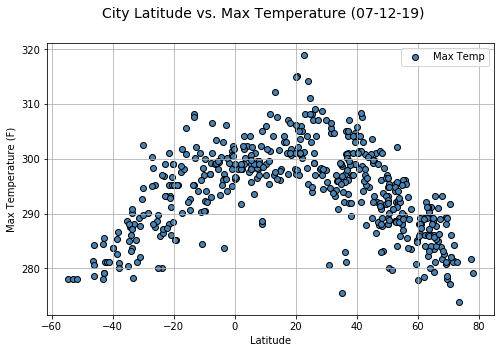

In [13]:
weather_plot('lat_vs_temperature', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Max Temp'], 
             'City Latitude vs. Max Temperature (07-12-19)', 
             'Latitude', 
             'Max Temperature (F)')

#### Latitude vs. Humidity Plot

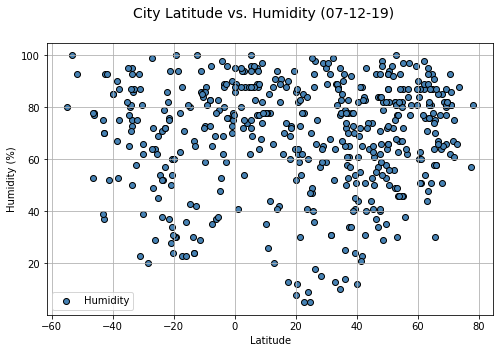

In [14]:
weather_plot('lat_vs_humidity', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Humidity'], 
             'City Latitude vs. Humidity (07-12-19)', 
             'Latitude', 
             'Humidity (%)')

#### Latitude vs. Cloudiness Plot

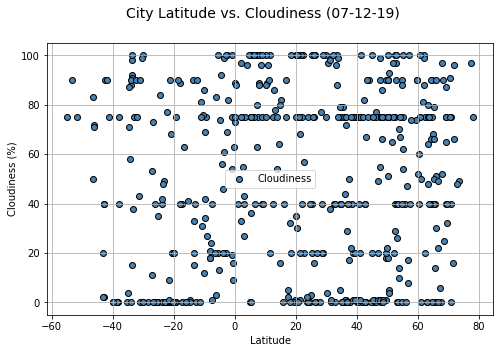

In [15]:
weather_plot('lat_vs_cloudiness', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Cloudiness'], 
             'City Latitude vs. Cloudiness (07-12-19)', 
             'Latitude', 
             'Cloudiness (%)')

#### Latitude vs. Wind Speed Plot

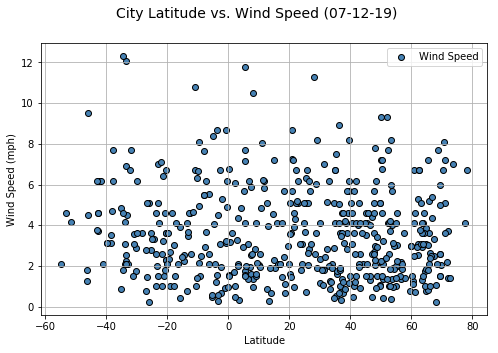

In [16]:
weather_plot('lat_vs_wind_speed', 
             _openweather_info_df['Lat'], 
             _openweather_info_df['Wind Speed'], 
             'City Latitude vs. Wind Speed (07-12-19)', 
             'Latitude', 
             'Wind Speed (mph)')